In [1]:
from MLJEC_MCTruth_Model import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Using TensorFlow backend.


In [2]:
model = loadModel('model_eta_dense_pt_dense_updatedSept21')

/usr/local/lib/python2.7/site-packages/keras/engine/topology.py:1252: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [3]:
df = pd.read_pickle('new_ak7.pkl')

In [4]:
scaler = StandardScaler()
df['jet_eta_ak7_scaled'] = df['jet_eta_ak7'] / 2.5
df['jet_pt_ak7_exp'] = map(np.log,df['jet_pt_ak7'])
df['jet_pt_ak7_scaled'] = scaler.fit_transform(df['jet_pt_ak7_exp'].reshape(-1, 1))
df.head()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


,event,run,lumi,ak7pfcand_ijet,ak7pfcand_eta,ak7pfcand_phi,ak7pfcand_pt,ak7pfcand_charge,ak7pfcand_id,met,...,jet_charHad_mult_ak7,jet_neutHad_mult_ak7,jet_photon_frac_ak7,jet_electron_frac_ak7,jet_muon_frac_ak7,jet_charHad_frac_ak7,jet_neutHad_frac_ak7,jet_eta_ak7_scaled,jet_pt_ak7_exp,jet_pt_ak7_scaled
0,2828,1,12,0,"[-1.00876903534, -1.00456035137, -1.0215094089...","[-0.202069446445, -0.180981457233, -0.18487790...","[215.670425415, 69.4226837158, 37.9222221375, ...","[0, -1, 0, 1, -1, -1, 1, -1, 0, 0, 0, 0, 0, -1...","[130, 211, 22, 211, 211, 211, 211, 211, 22, 22...",0.000000,...,20,1,0.152699,0.000000,0.0,0.361819,0.438379,-0.406533,6.198423,2.289548
1,2828,1,12,1,"[1.66161680222, 1.66750192642, 1.68926799297, ...","[-2.74814629555, -2.76039361954, -2.7736279964...","[69.3041152954, 63.403377533, 27.3246078491, 2...","[-1, 1, -1, 1, 0, 1, 1, -1, -1, -1, -1, 1, -1,...","[211, 211, 211, 211, 22, 211, 211, 211, 211, 2...",0.000000,...,23,3,0.073722,0.000000,0.0,0.884433,0.013427,0.668941,5.602830,0.828360
2,2828,1,12,2,"[0.528619468212, 0.530503809452, 0.50972801446...","[2.67870116234, 2.38817501068, 2.41568040848, ...","[33.1523323059, 31.7618350983, 16.7182769775, ...","[-1, 0, 1, 1, -1, 0, 0, 1, 0, -1, 1, -1, 1, -1...","[211, 22, 211, 211, 211, 22, 22, 211, 130, 211...",0.000000,...,23,7,0.339825,0.014132,0.0,0.571310,0.078258,0.205118,5.187951,-0.189479
3,2828,1,12,3,"[-0.301580011845, -0.340516895056, -0.52871024...","[2.22358512878, 2.25516295433, 2.2361035347, 2...","[60.3280105591, 20.7011852264, 13.2065992355, ...","[0, 1, 0, -1, -1, 1, 0, -1, 0, 0, 0, 0, -1, 0,...","[22, 211, 22, 211, 211, 211, 22, 211, 22, 22, ...",0.000000,...,8,2,0.701894,0.000000,0.0,0.294783,0.011919,-0.135060,4.807371,-1.123170
4,2829,1,12,0,"[0.167199209332, 0.202694311738, 0.16929551959...","[1.42906928062, 1.42884945869, 1.41367650032, ...","[148.439788818, 24.7823085785, 22.5962409973, ...","[0, -1, 1, 0, 1, 0, 1, 1, 1, -1, 0, 0, -1, -1,...","[22, 211, 211, 22, 211, 130, 211, 211, 211, 21...",15.200917,...,21,4,0.519882,0.000000,0.0,0.396774,0.062894,0.074879,5.982409,1.759595


In [5]:
jet_image = np.array(map(lambda x : x[0] , df['jet_image']))

In [6]:
inputs = [jet_image.reshape([-1,30,30,1]),np.array(df['jet_pt_ak7_scaled']),np.array(df['jet_eta_ak7_scaled'])]

In [7]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy','mse','msle'])

In [8]:
df['prediction_CNN'] = model.predict(inputs)
df['residual_CNN'] = df['prediction_CNN'] - df['jet_jes_ak7']

In [11]:
df.to_pickle('new_ak7_withCNN.pkl')

In [9]:
def residual_profile(indep_var,dep_var,c,low_bin,high_bin,nbins):
    print "plot_var:",indep_var
    print "low_bin:",low_bin
    print "high_bin:",high_bin
    print "nbins:",nbins
    df[indep_var+'_bins'] = pd.cut(df[indep_var],np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins)),labels=range(nbins))
    means = df.groupby([indep_var+'_bins']).mean()[dep_var].values
    counts = df.groupby([indep_var+'_bins']).count()[dep_var].values
    sqrt_counts = map(np.sqrt,counts)
    errs  = df.groupby([indep_var+'_bins']).std()[dep_var].values
    errs = errs/sqrt_counts
    bin_center=np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins))
    bin_center = bin_center[:-1]
    bin_center = map(lambda x : x+(high_bin-low_bin)/float(nbins)/2.,bin_center)
    plt.errorbar(x=bin_center,y=means,yerr=errs,fmt='o',color=c)
    plt.xlabel(indep_var)
    plt.ylabel("<residual>")
    plt.ylim(-0.05,0.05)

plot_var: jet_pt_ak7
low_bin: 100
high_bin: 1000
nbins: 90


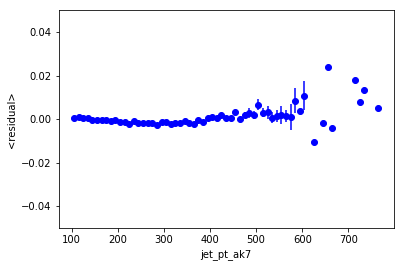

plot_var: jet_eta_ak7
low_bin: -3
high_bin: 3
nbins: 60


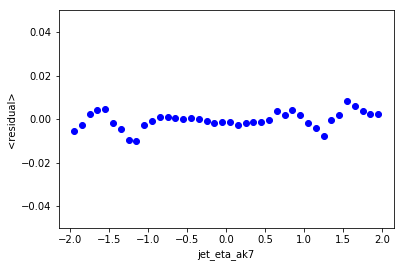

plot_var: jet_electron_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


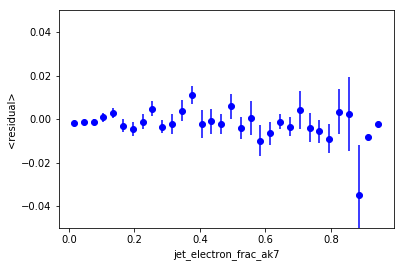

plot_var: jet_muon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


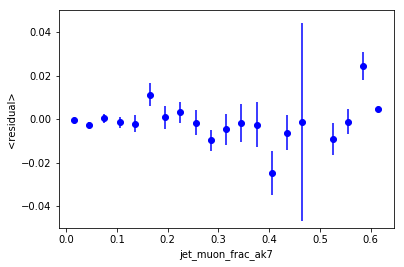

plot_var: jet_photon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


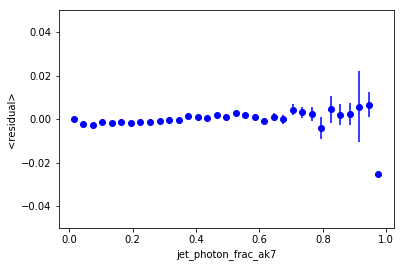

plot_var: jet_neutHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


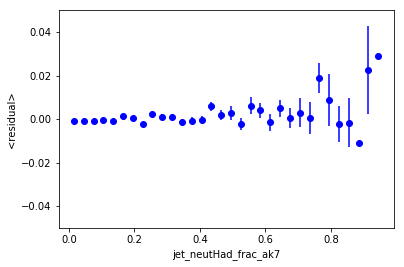

plot_var: jet_charHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


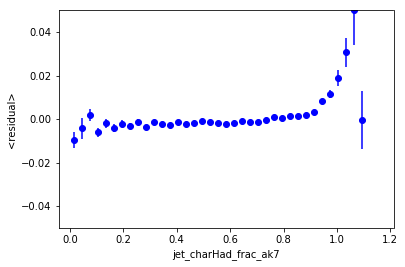

plot_var: jet_electron_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


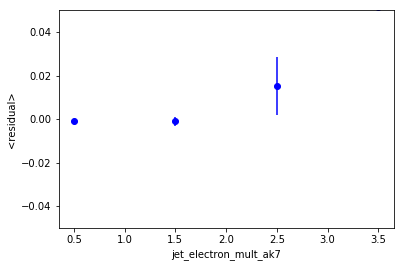

plot_var: jet_muon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


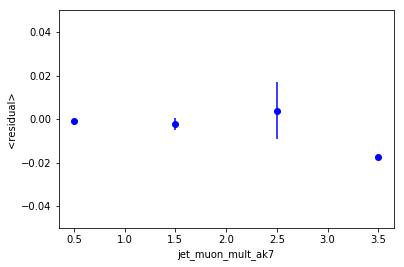

plot_var: jet_photon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


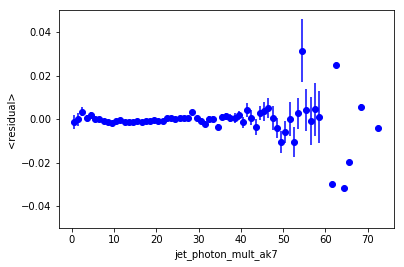

plot_var: jet_neutHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


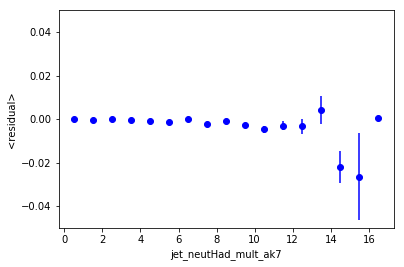

plot_var: jet_charHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


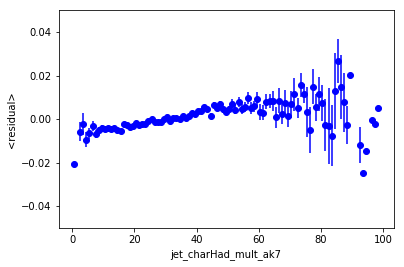

In [10]:
plot_vars=['jet_pt_ak7','jet_eta_ak7','jet_electron_frac_ak7','jet_muon_frac_ak7','jet_photon_frac_ak7','jet_neutHad_frac_ak7','jet_charHad_frac_ak7','jet_electron_mult_ak7','jet_muon_mult_ak7','jet_photon_mult_ak7','jet_neutHad_mult_ak7','jet_charHad_mult_ak7']
var_binning = [(100,1000,90),(-3,3,60),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,100,100),(0,100,100),(0,100,100),(0,100,100),(0,100,100)]
for v,b in zip(plot_vars,var_binning) :
    residual_profile(v,'residual_CNN','b',*b)
    plt.show()